## Search by two parameters ##

In [ ]:
import os

def search_files_by_keyword(directory, keyword, keyword2, file_format):
    # Get the list of files in the specified directory
    file_names = os.listdir(directory)
    # Search for the keyword in each file name
    matching_files = [file 
                      for file in file_names 
                      if (keyword and keyword2) in file and file.endswith(file_format) ] 

    return matching_files

# Example usage
directory_path = '/mnt/d/testdata'
search_keyword = input('enter the search parameter:')
search_keyword2 = input('enter the 2 search parameter:')
desired_format = '.opju'  # Specify the desired file format, e.g., '.txt', '.pdf', '.jpg'
                      
matching_files = search_files_by_keyword(directory_path, search_keyword, search_keyword2, desired_format)

if matching_files:
    print(f"Files containing the keyword '{search_keyword}' the keyword '{search_keyword2} with format '{desired_format}':")
    for file in matching_files:
        print(file)
else:
    print(f"No files found with the keyword '{search_keyword}' and format '{desired_format}'.")

Roberto.schmidt@posteo.de

## This part is about reading and searching file names with list of keywords ##

In [2]:
import os
import pandas as pd

def search_files_by_keyword(directory, keywords, file_format):
    # Get the list of files in the specified directory
    file_names = os.listdir(directory)
    
      
    # Search for the keyword in each file name
    matching_files = [file #return file
                      for file in file_names # listing files in directory
                      if all(keyword in file for keyword in keywords) and (file.endswith(file_format) or file.endswith(file_format[:-1]))# searching for all keywords
] 

    return matching_files


directory_path = 'D:\electrochemistry experiments\Carbon_ZOA'
search_keyword = input('Tell me search parameters:').split(' ')
desired_format = '.opju' # Specify the desired file format, e.g., '.txt', '.pdf', '.jpg'
                      
matching_files = search_files_by_keyword(directory_path, search_keyword, desired_format)

if matching_files:
    print(f"Files containing the keyword '{search_keyword}' with format '{desired_format}':")
    for file in matching_files:
        print(file)
        
else:
    print(f"No files found with the keyword '{search_keyword}' and format '{desired_format}'.")
    

Files containing the keyword '['PFD_617_R_Carb_2']' with format '.opju':
20221019_PFD_617_R_Carb_2_ZOA_imbibition_hanging_0-1M-NaCl.opj
20221115_PFD_617_R_Carb_2_ZOA_immersed_0-1M-NaCl.opj
20221116_PFD_617_R_Carb_2_ZOA_immersed_0-1M-NaCl.opj
20221121_PFD_617_R_Carb_2_ZOA_drying_hanging_0-1M-NaCl_without_RE_1.opj
20230127_PFD_617_R_Carb_2_OCP.opju
20231019_PFD_617_R_Carb_2_ZOA_carbonclothXcarboncloth_imbibition_unsealed_0-1M-NaCl_1st_cycle_with_gravimetry.opju


## This part is about data processing ##

In [3]:
dataset = pd.read_csv(f'/mnt/d/testdata/{file}', delimiter = '\t') #CAUTION! importing data from LAST file!
dataset

FileNotFoundError: File b'/mnt/d/testdata/20231019_PFD_617_R_Carb_2_ZOA_carbonclothXcarboncloth_imbibition_unsealed_0-1M-NaCl_1st_cycle_with_gravimetry.opju' does not exist

In [ ]:
dataset.columns

In [ ]:
time_in_min = lambda x: x / 60 #time from seconds to minutes
dataset['Time (s)'] = dataset['Time (s)'].apply(time_in_min)
current_in_mic = lambda x: x * 1000000 # current from A to micA
dataset['WE(1).Current (A)'] = dataset['WE(1).Current (A)'].apply(current_in_mic)
dataset = dataset.drop('Index', axis=1) #removing index column
#changing names
renamed = dataset.rename(columns={"Time (s)": "Time (min)", "WE(1).Current (A)": "Current (micA)", "WE(1).Potential (V)": "Potential (V)", "WE(1).Charge (C)":"Charge (C)", "WE(1).Power (W)":"Power (W)"})
renamed

In [ ]:
#panda plot in log scale
renamed.plot(kind = "line", x = "Time (min)", y = "Current (micA)", logy = True, logx = True, )
# y = "Current (micA)",

## This part is about reading several data files##

In [1]:
import os
import pandas as pd

def search_files_by_keyword(directory, keywords, file_format):
    # Get the list of files in the specified directory
    file_names = os.listdir(directory)
    
      
    # Search for the keyword in each file name
    matching_files = [file #return file
                      for file in file_names # listing files in directory
                      if all(keyword in file for keyword in keywords) and file.endswith(file_format)# searching for all keywords
                      # ключевое слово ищется в каждом файле из списка, прежде чем перейти к новому файлу в имени этого проверяются все ключевые слова
                    # keyword is searched for in each file in the list, all keywords are checked in the name of this file before moving to a new file
                     ] 

    return matching_files


directory_path = 'D:\electrochemistry experiments\Carbon_ZOA'
search_keyword = input('Tell me search parameters:').split(' ')
desired_format = '.txt'  # Specify the desired file format, e.g., '.txt', '.pdf', '.jpg' '.opju'
                      
matching_files = search_files_by_keyword(directory_path, search_keyword, desired_format)

if matching_files:
    print(f"Files containing the keyword '{search_keyword}' with format '{desired_format}':")
    for file in matching_files:
        print(file)
    # Gathering all file names into a single list
    all_file_names = matching_files
    print("\nAll file names in a single list:")
    #print(all_file_names)    
        
else:
    print(f"No files found with the keyword '{search_keyword}' and format '{desired_format}'.")
    

Tell me search parameters:PFD_615_R_Carb_2_ZOA_carbonclothXcarboncloth_imbibition_unsealed_0-1M-NaCl
Files containing the keyword '['PFD_615_R_Carb_2_ZOA_carbonclothXcarboncloth_imbibition_unsealed_0-1M-NaCl']' with format '.txt':
20230928_PFD_615_R_Carb_2_ZOA_carbonclothXcarboncloth_imbibition_unsealed_0-1M-NaCl_1st_cycle_with_gravimetry.txt
20231002_PFD_615_R_Carb_2_ZOA_carbonclothXcarboncloth_imbibition_unsealed_0-1M-NaCl_2nd_cycle_with_gravimetry.txt
20231005_PFD_615_R_Carb_2_ZOA_carbonclothXcarboncloth_imbibition_unsealed_0-1M-NaCl_3rd_cycle_with_gravimetry.txt
20231009_PFD_615_R_Carb_2_ZOA_carbonclothXcarboncloth_imbibition_unsealed_0-1M-NaCl_4th_cycle_with_gravimetry.txt

All file names in a single list:


In [ ]:
all_file_names

In [2]:
def read_files_and_create_tables(file_names):
    # Dictionary to store tables with file names as keys
    tables = {}

    for file_name in file_names:
        try:
            # Assuming the files are in CSV format, adjust as needed
            table = pd.read_csv(f'D:\electrochemistry experiments\Carbon_ZOA\{file_name}', delimiter = '\t')
            
            # Use the file name (without extension) as the key for the table
            key = file_name.rsplit('.', 1)[0]
            
            # Add the table to the dictionary
            tables[key] = table
        except Exception as e:
            print(f"Error reading file '{file_name}': {e}")

    return tables


# Call the function to read files and create tables
resulting_tables = read_files_and_create_tables(all_file_names)

# Now 'resulting_tables' is a dictionary where keys are file names and values are Pandas DataFrames containing the data from each file
# You can further manipulate or analyze the data in each table as needed
for key, table in resulting_tables.items():
    print(f"Table for file '{key}':")
    print(table.head(5))
    print("\n")


Table for file '20230928_PFD_615_R_Carb_2_ZOA_carbonclothXcarboncloth_imbibition_unsealed_0-1M-NaCl_1st_cycle_with_gravimetry':
    Time (s)  WE(1).Current (A)  WE(1).Potential (V)  WE(1).Charge (C)  \
0   3.596152           0.003777            -0.115753          0.000000   
1   5.596152           0.003613            -0.113373          0.007390   
2   7.596152           0.003501            -0.111847          0.014503   
3   9.596152           0.003416            -0.110870          0.021421   
4  11.596152           0.003346            -0.110291          0.028183   

   WE(1).Power (W)  Index  
0        -0.000437      1  
1        -0.000410      2  
2        -0.000392      3  
3        -0.000379      4  
4        -0.000369      5  


Table for file '20231002_PFD_615_R_Carb_2_ZOA_carbonclothXcarboncloth_imbibition_unsealed_0-1M-NaCl_2nd_cycle_with_gravimetry':
    Time (s)  WE(1).Current (A)  WE(1).Potential (V)  WE(1).Charge (C)  \
0   2.548155          -0.000476             0.223938   

In [3]:
for key, table in resulting_tables.items():
    table.columns #The column labels of the DataFrame.

Table for file '20230928_PFD_615_R_Carb_2_ZOA_carbonclothXcarboncloth_imbibition_unsealed_0-1M-NaCl_1st_cycle_with_gravimetry':
     Time (min)  Current (micA)  Potential (V)  Charge (C)  Power (W)
0  7.707802e-11    3.776855e+33      -0.115753    0.000000  -0.000437
1  1.199450e-10    3.612671e+33      -0.113373    0.007390  -0.000410
2  1.628119e-10    3.501282e+33      -0.111847    0.014503  -0.000392
3  2.056788e-10    3.416138e+33      -0.110870    0.021421  -0.000379
4  2.485458e-10    3.346252e+33      -0.110291    0.028183  -0.000369


Table for file '20231002_PFD_615_R_Carb_2_ZOA_carbonclothXcarboncloth_imbibition_unsealed_0-1M-NaCl_2nd_cycle_with_gravimetry':
     Time (min)  Current (micA)  Potential (V)  Charge (C)  Power (W)
0  5.461580e-11   -4.763184e+32       0.223938    0.000000  -0.000107
1  9.748275e-11   -4.691467e+32       0.224335   -0.000945  -0.000105
2  1.403497e-10   -4.633179e+32       0.223999   -0.001878  -0.000104
3  1.832166e-10   -4.582214e+32       0.22

C:\Programfiles\Anaconda3\lib\site-packages\matplotlib\ticker.py:2039: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


Table for file '20231005_PFD_615_R_Carb_2_ZOA_carbonclothXcarboncloth_imbibition_unsealed_0-1M-NaCl_3rd_cycle_with_gravimetry':
     Time (min)  Current (micA)  Corrected time (s)  Potential (V)  \
0  5.491570e-11    1.843567e+33                 0.0      -0.021237   
1  9.778264e-11    1.754761e+33                 2.0      -0.020395   
2  1.406496e-10    1.690674e+33                 4.0      -0.019867   
3  1.835165e-10    1.639099e+33                 6.0      -0.019467   
4  2.263835e-10    1.594543e+33                 8.0      -0.019183   

   Charge (C)  Power (W)  
0    0.000000  -0.000039  
1    0.003598  -0.000036  
2    0.007044  -0.000034  
3    0.010374  -0.000032  
4    0.013607  -0.000031  


Table for file '20231009_PFD_615_R_Carb_2_ZOA_carbonclothXcarboncloth_imbibition_unsealed_0-1M-NaCl_4th_cycle_with_gravimetry':
     Time (min)  Current (micA)  Potential (V)  Charge (C)  Power (W)
0  8.560867e-11    9.439087e+32      -0.035281    0.000000  -0.000033
1  1.284756e-10    

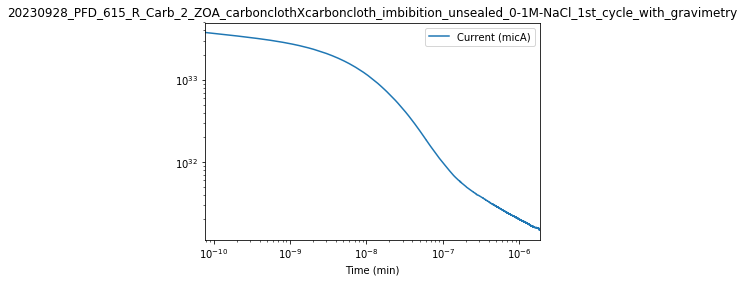

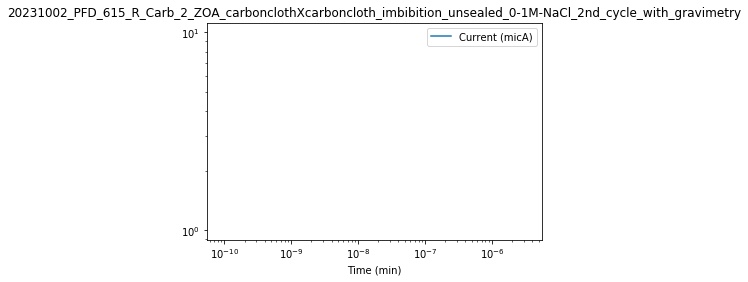

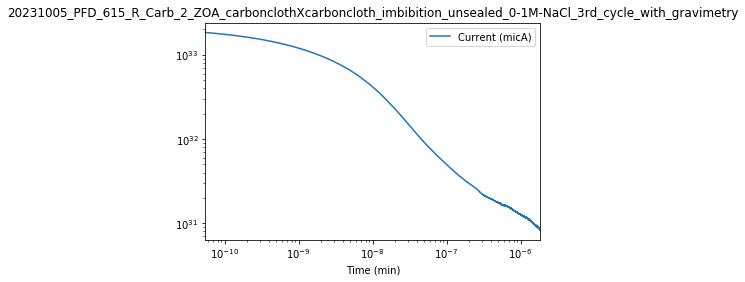

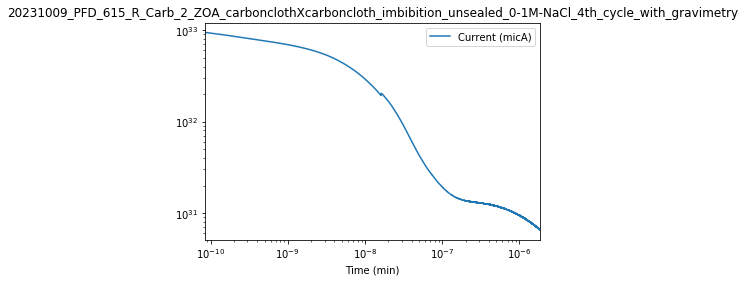

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
time_in_min = lambda x: x / 60 #time from seconds to minutes
current_in_mic = lambda x: x * 1000000 # current from A to micA
for key, table in resulting_tables.items():
    table['Time (s)'] = table['Time (s)'].apply(time_in_min)
    table['WE(1).Current (A)'] = table['WE(1).Current (A)'].apply(current_in_mic)
    table = table.drop('Index', axis=1) #removing index column|
    #changing names
    table = table.rename(columns={"Time (s)": "Time (min)", "WE(1).Current (A)": "Current (micA)", "WE(1).Potential (V)": "Potential (V)", "WE(1).Charge (C)":"Charge (C)", "WE(1).Power (W)":"Power (W)"})
    print(f"Table for file '{key}':")
    print(table.head(5))
    print("\n")
    table.plot(kind = "line", x = "Time (min)", y = "Current (micA)", logy = True, logx = True,title=f"{key}") 

In [9]:
import matplotlib.pyplot as plt
#for key, table in resulting_tables.items():
first = resulting_tables['20230928_PFD_615_R_Carb_2_ZOA_carbonclothXcarboncloth_imbibition_unsealed_0-1M-NaCl_1st_cycle_with_gravimetry']
print(first)
first.plot(kind = "line", x = "Time (min)", y = "Current (micA)", logy = True, logx = True, )
#panda plot in log scale
#keylist = resulting_tables.keys()
print(keylist)
# y = "Current (micA)",
plt.show()

        Time (s)  WE(1).Current (A)  WE(1).Potential (V)  WE(1).Charge (C)  \
0       0.000999       3.776855e+09            -0.115753          0.000000   
1       0.001554       3.612671e+09            -0.113373          0.007390   
2       0.002110       3.501282e+09            -0.111847          0.014503   
3       0.002666       3.416138e+09            -0.110870          0.021421   
4       0.003221       3.346252e+09            -0.110291          0.028183   
5       0.003777       3.286743e+09            -0.109772          0.034816   
6       0.004332       3.233643e+09            -0.109314          0.041337   
7       0.004888       3.187561e+09            -0.109039          0.047758   
8       0.005443       3.145447e+09            -0.108856          0.054091   
9       0.005999       3.106384e+09            -0.108704          0.060343   
10      0.006554       3.070068e+09            -0.108490          0.066519   
11      0.007110       3.036804e+09            -0.108368        

KeyError: 'Time (min)'

In [7]:
plot = table.plot(kind = "line", x = "Time (min)", y = "Current (micA)")
plot